In [43]:
using ITensors 
using Plots

In [39]:
ITensors.op(::OpName"Exponent",::SiteType"Boson") =   
exp(1im*pi*"N")    

In [40]:
ITensors.op(::OpName"ExponentHC",::SiteType"Boson") =   
exp(-1im*pi*"N")    
#exponenti = 1im*theta*op("N",sites,i)
#Expni = exp(exponenti)

In [41]:
##BH-Model and phase diagram 
function energyfor(N, L, J)
#L = 9 #Number of Sites
#N = 9 #Number of bosons
sites = siteinds("Boson", L; dim = 4 ,  conserve_number = false, conserve_qns= true ) 
# C++ configuration
#sites = Boson(L, {"MaxOcc=", N, "ConserveQNs", true, "ConserveNb", false})
sweeps = Sweeps(2)
setmaxdim!(sweeps, 200, 400, 800)
setcutoff!(sweeps, 1E-16)

U = 1.0
#J = 1.0
theta = pi

 
    
ampo = OpSum() 

for i in 1:(L-1)
    ampo += - U / 2, "N", i;
    ampo += U / 2, "N", i, "N", i;     
    ampo += -J,"Exponent"  , i ,"A", i, "Adag", i + 1; 
    #mexponenti = -1im*theta*op("N",sites,i)
    #MExpni = exp(mexponenti)
    ampo += -J, "Adag", i, "A", i + 1, "ExponentHC", i + 1;
end  
#Periodic terms 
ampo += -J,"Exponent"  , 1 , "A", 1, "Adag", L;
ampo += -J, "Adag", 1, "A", L,"ExponentHC"  , L; 
#term for interaction on the L site
ampo += -U/2, "N", L;
ampo += U/2, "N", L,"N", L; 
##########################
#ampo += V, "N", 1, "N", L;
H = MPO(ampo, sites) 
    if N==L
        state = ["1" for i in 1:L]  
    elseif N>L 
        state = ["1" for i in 1:L] 
        state[1] = "2"     
    else
        state = ["1" for i in 1:L]  
        state[1] = "0"  
    end 
psi = randomMPS(sites, state)

energy, psi0 = dmrg(H, psi, sweeps, outputlevel = 0) #Outputlevel used to do not see the output of each sweep of dmrg
    return energy 
end

energyfor (generic function with 1 method)

In [42]:
energyfor(6,5,1)

LoadError: MethodError: no method matching op(::OpName{:Exponent}, ::SiteType{Qudit}, ::Int64)
[0mClosest candidates are:
[0m  op([91m::Function[39m, ::Any...; kwargs...) at /home/ronaldo/.julia/packages/ITensors/PisGD/src/physics/sitetype.jl:458
[0m  op([91m::Vector{var"#s538"} where var"#s538"<:Index[39m, ::Any, ::Integer...; kwargs...) at /home/ronaldo/.julia/packages/ITensors/PisGD/src/physics/sitetype.jl:442
[0m  op([91m::Vector{var"#s540"} where var"#s540"<:Index[39m, ::Any, ::Integer, [91m::NamedTuple[39m) at /home/ronaldo/.julia/packages/ITensors/PisGD/src/physics/sitetype.jl:450
[0m  ...

In [14]:
##Chemical potential
N = 9
M = 9
valuesofen = Vector{Float64}()
for t in 0:0.05:0.50  
    push!(valuesofen, energyfor(N, M, t))
end  
valuesofenlow = Vector{Float64}()
for t in 0:0.05:0.50  
    push!(valuesofenlow, energyfor((N-1), M, t))
end 
valuesofenup = Vector{Float64}() 
for t in 0:0.05:0.50  
    push!(valuesofenup, energyfor((N+1), M, t))
end 


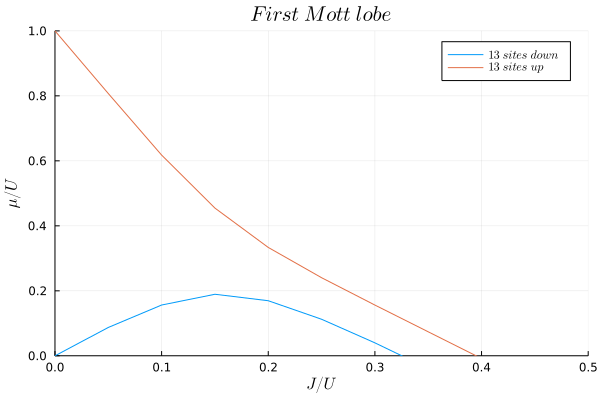

In [16]:
#graph
t = 0:0.05:0.50
plot(t,valuesofen-valuesofenlow , xlabel =L"J/U", ylabel=L"\mu/U", title =L"First~Mott~lobe", label =L"13~sites~down", xlims=(0, 0.50), ylims=(0,1))
plot!(t,valuesofenup-valuesofen , xlabel =L"J/U", ylabel=L"\mu/U", title =L"First~Mott~lobe", label =L"13~sites~up", xlims=(0, 0.50), ylims=(0,1))
#savefig("FirstmottlobeDMRG.png")